Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]  
*Задание 1*   
    Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за Y - значения скорингового балла (то есть, ks - целевая переменная).   
Произвести расчет как с использованием intercept, так и без.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [2]:
import scipy.stats as stats
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

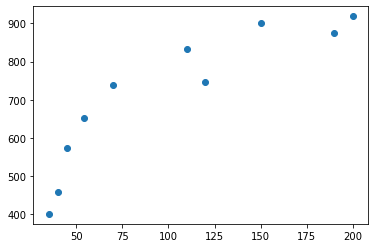

In [3]:
# Проверка наличия зависимости по графику
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
plt.show

*Расчет с intercept:*  
По графику наблюдается линейная зависимость, описываемая уравнением ks (Y) = a + b * zp (X)

In [6]:
n = len (zp)
b = (n * np.sum(zp*ks) - np.sum(zp) * np.sum(ks)) / (n * np.sum(zp**2)-np.sum(zp)**2)
b

2.6205388824027653

In [7]:
a=np.mean(ks)-b*np.mean(zp)
a

444.17735732435955

In [12]:
print(f'Таким образом имеется зависимость ks = {round(a,2)} + {round(b,2)} * zp')

Таким образом имеется зависимость ks = 444.18 + 2.62 * zp


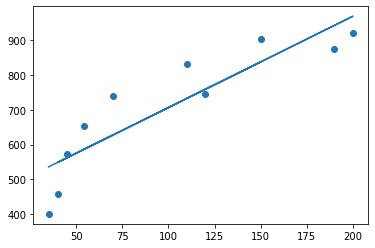

In [16]:
plt.scatter(zp , ks)
plt.plot(zp,444.18+2.62*zp)
plt.show()

*Расчет без intercept (матричный метод):*

In [31]:
zp=zp.reshape(-1,1)
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [32]:
ks=ks.reshape(-1,1)
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [35]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[5.88982042]])

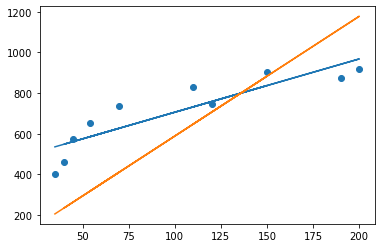

In [36]:
plt.scatter(zp , ks)
plt.plot(zp,444.18+2.62*zp)
plt.plot(zp,B*zp)
plt.show()

*Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).*

In [56]:
def mse_(b, x, y):
    return np.sum((b*x-y)**2)/len(x)

In [59]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha =1e-6
B1 = 0.1
n=10

for i in range (5000):
    B1 -= alpha * (2/n) * np.sum((B1*x-y)*x)
    if i % 500 ==0:
        print ('iteration = {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse_(B1, x, y)))

iteration = 0, B1 = 0.25952808, mse = 493237.7212546963
iteration = 500, B1 = 5.889815595583751, mse = 56516.858416040064
iteration = 1000, B1 = 5.8898204201285544, mse = 56516.85841571941
iteration = 1500, B1 = 5.889820420132673, mse = 56516.85841571943
iteration = 2000, B1 = 5.889820420132673, mse = 56516.85841571943
iteration = 2500, B1 = 5.889820420132673, mse = 56516.85841571943
iteration = 3000, B1 = 5.889820420132673, mse = 56516.85841571943
iteration = 3500, B1 = 5.889820420132673, mse = 56516.85841571943
iteration = 4000, B1 = 5.889820420132673, mse = 56516.85841571943
iteration = 4500, B1 = 5.889820420132673, mse = 56516.85841571943


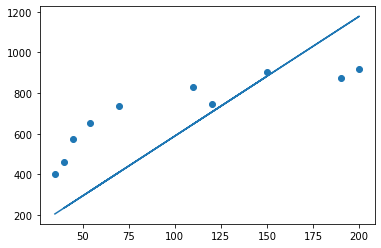

In [63]:
plt.scatter(x , y)
plt.plot(x,B1*x)
plt.show()